In [1]:
import numpy as np
from numpy.linalg import norm
import pickle
import matplotlib.pyplot as plt
import copy
import math
import time
import scipy
from pathlib import Path
import scipy.io

%matplotlib inline

# EFTP: analysis of $\|F(x^N)\|^2$

## $L = 1, \mu = 0$

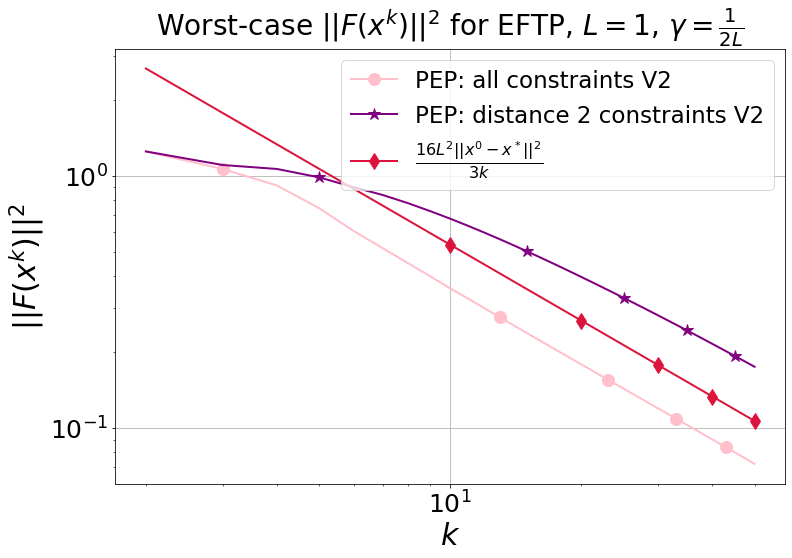

In [51]:
L = 1.0
gamma = 1.0/(2*L)
N_max = 50

worst_case_sq_norm = np.array([])
worst_case_sq_norm_2_points = np.array([])
worst_case_sq_norm_more_constraints = np.array([])
worst_case_sq_norm_2_points_more_constraints = np.array([])
# worst_case_sq_norm_4_points = np.array([])
# worst_case_sq_norm_8_points = np.array([])
guessed_upper_bound = np.array([])

gamma_str = '%.6f' % gamma

for N in range(N_max-1):
#     res = scipy.io.loadmat('dump/EFTP_norm_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_str+'.mat')
#     worst_case_sq_norm = np.append(worst_case_sq_norm, res['res_norm'][0][0])
#     res_2_points = scipy.io.loadmat('dump/EFTP_norm_2_points_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_str+'.mat')
#     worst_case_sq_norm_2_points = np.append(worst_case_sq_norm_2_points, res_2_points['res_norm'][0][0])
    res_more = scipy.io.loadmat('dump/EFTP_2_norm_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_str+'.mat')
    worst_case_sq_norm_more_constraints = np.append(worst_case_sq_norm_more_constraints, res_more['res_norm'][0][0])
    res_2_points_more = scipy.io.loadmat('dump/EFTP_2_norm_2_points_L_'+str(int(L))+'_N_'+str(N+2)+'__'+gamma_str+'.mat')
    worst_case_sq_norm_2_points_more_constraints = np.append(worst_case_sq_norm_2_points_more_constraints, res_2_points_more['res_norm'][0][0])
#     res_4_points = scipy.io.loadmat('dump/OG_norm_4_points_L_'+str(int(L))+'_N_'+str(N+1)+'__'+gamma_str+'.mat')
#     worst_case_sq_norm_4_points = np.append(worst_case_sq_norm_4_points, res_4_points['res_norm'][0][0])
#     res_8_points = scipy.io.loadmat('dump/OG_norm_8_points_L_'+str(int(L))+'_N_'+str(N+1)+'__'+gamma_str+'.mat')
#     worst_case_sq_norm_8_points = np.append(worst_case_sq_norm_8_points, res_8_points['res_norm'][0][0])
    guessed_upper_bound = np.append(guessed_upper_bound, 16.0*L/(3*(N+2)))
    
fig = plt.figure(figsize=(12,8))
plt.title(r"Worst-case $||F(x^k)||^2$ for EFTP, $L = 1$, $\gamma = \frac{1}{2L}$", fontsize=28)

# plt.semilogy(np.array(range(N_max-1))+2, worst_case_sq_norm, linewidth=2,
#              markersize = 12, marker = "o",
#              markevery=range(0, N_max-1, 10), color="forestgreen",
#              label='PEP: all constraints')
plt.semilogy(np.array(range(N_max-1))+2, worst_case_sq_norm_more_constraints, linewidth=2,
             markersize = 12, marker = "o",
             markevery=range(1, N_max-1, 10), color="pink",
             label='PEP: all constraints V2')
# plt.semilogy(np.array(range(N_max-1))+2, worst_case_sq_norm_2_points, linewidth=2,
#              markersize = 12, marker = "*",
#              markevery=range(2, N_max-1, 10), color="darkblue",
#              label='PEP: distance 2 constraints')
plt.semilogy(np.array(range(N_max-1))+2, worst_case_sq_norm_2_points_more_constraints, linewidth=2,
             markersize = 12, marker = "*",
             markevery=range(3, N_max-1, 10), color="purple",
             label='PEP: distance 2 constraints V2')
# plt.semilogy(np.array(range(N_max))+1, worst_case_sq_norm_4_points, linewidth=2,
#              markersize = 12, marker = "^",
#              markevery=range(4, N_max, 10), color="purple",
#              label='PEP: distance 4 constraints')
# plt.semilogy(np.array(range(N_max))+1, worst_case_sq_norm_8_points, linewidth=2,
#              markersize = 12, marker = ">",
#              markevery=range(6, N_max, 10), color="orange",
#              label='PEP: distance 8 constraints')
plt.semilogy(np.array(range(N_max-1))+2, guessed_upper_bound, linewidth=2, 
             markersize = 12, marker = "d",
             markevery=range(8, N_max-1, 10), color="crimson",
             label=r'$\frac{16L^2||x^0 - x^*||^2}{3k}$')


plt.legend(loc='upper right', fontsize=23)
plt.xlabel(r"$k$", fontsize=30)
plt.ylabel(r"$||F(x^k)||^2$", fontsize=30)

plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)

plt.grid()

ax = fig.gca()
ax.xaxis.offsetText.set_fontsize(28)
ax.yaxis.offsetText.set_fontsize(28)

ax.set_xscale('log')

plt.savefig("plot/EFTP_norm_L_"+str(L)+'_N_'+str(N_max)+".png", bbox_inches='tight')